In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [56]:
#Importing dataframe
processed_df = pd.read_csv('data/processed_data/co2_country_year.csv')

In [57]:
modern_pd = processed_df.loc[processed_df['Year'] == 2019]

In [58]:
modern_pd = modern_pd.groupby('COU').Total_MTCO2.max()

In [59]:
modern_pd.describe()

count      205.000000
mean       354.256833
std       2719.250215
min          0.007328
25%          1.952912
50%         11.232139
75%         65.756232
max      37082.558969
Name: Total_MTCO2, dtype: float64

<AxesSubplot:xlabel='Total_MTCO2', ylabel='Count'>

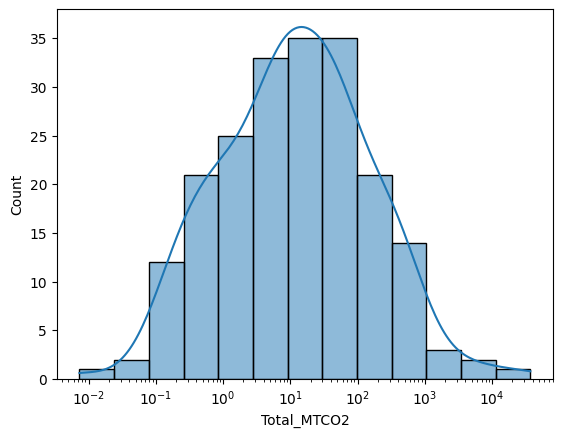

In [60]:
sns.histplot(data=modern_pd,log_scale=True, kde=True)

In [61]:
# removing massive outliers pt 1
Q1 = modern_pd.quantile(.25)
Q2 = modern_pd.quantile(.75)
IQR = Q2 - Q1

upper_bound = Q2 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

In [62]:
# removing massive outliers pt 2
modern_pd = modern_pd.loc[(modern_pd > lower_bound) & (modern_pd < upper_bound)]

In [63]:
modern_pd = modern_pd.loc[(modern_pd > (modern_pd.mean() - modern_pd.std()/2)) & (modern_pd < (modern_pd.mean() + modern_pd.std()/2))]
len(modern_pd)

57

In [64]:
average_processed_df = processed_df.loc[processed_df['COU'].isin(modern_pd.index)]
average_processed_df

,COU,Year,Country,Total_MTCO2,Coal,Oil,Gas,Cement,Flaring,Other,MTCO2_per_cap,GDP_per_cap,PrecievedHealth,PercentOfPopulation
9,AFG,2011,Afghanistan,11.838316,4.180624,7.335328,0.307776,0.014588,0.0,NaN,0.404740,621.912311,NaN,NaN
10,AFG,2012,Afghanistan,10.035314,3.125392,6.573216,0.307776,0.028930,0.0,NaN,0.329389,663.141053,NaN,NaN
11,AFG,2013,Afghanistan,9.250510,3.326912,5.591264,0.296784,0.035550,0.0,NaN,0.293283,651.987862,NaN,NaN
12,AFG,2014,Afghanistan,9.170309,3.705783,5.164638,0.271244,0.028644,0.0,NaN,0.280299,628.146804,NaN,NaN
13,AFG,2015,Afghanistan,9.791093,2.843264,6.624512,0.282128,0.041189,0.0,NaN,0.290076,592.476537,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2483,ZWE,2015,Zimbabwe,12.254954,8.060800,3.609040,0.000000,0.585114,0.0,NaN,0.865772,1410.329174,NaN,NaN
2484,ZWE,2016,Zimbabwe,10.533453,6.932288,3.140048,0.000000,0.461117,0.0,NaN,0.728822,1421.787789,NaN,NaN
2485,ZWE,2017,Zimbabwe,9.596071,5.900452,3.226752,0.000000,0.468867,0.0,NaN,0.650533,1192.107012,NaN,NaN
2486,ZWE,2018,Zimbabwe,11.795478,7.177776,4.059712,0.000000,0.557990,0.0,NaN,0.783639,2269.177012,NaN,NaN


Goals:

The goal of this project is to identify trends in carbon dioxide emissions for countries with an average GDP, excluding major players like the US and China. By combining carbon emissions data with economic statistics such as GDP, population, household income, and unemployment rates, we aim to identify correlations and trends that can shed light on how these countries can address their carbon output. Specifically, we want to explore how countries with average GDP can reduce their carbon emissions and move towards a more sustainable future.

By analyzing this dataset, we aim to gain insights into the relationship between carbon emissions and economic indicators and develop recommendations for addressing carbon emissions in countries with an average GDP.

In [72]:
#Creating dataframe for only 2011 from average countries only

average_processed_df_2011 = average_processed_df[average_processed_df['Year'] == 2011]

In [73]:
#Creating dataframe for only 2011 from all countries

processed_df_2011 = processed_df[processed_df['Year'] == 2011]

In [97]:
#Creating dataframe for only 2016 from average countries only

average_processed_df_2015 = average_processed_df[average_processed_df['Year'] == 2015]

In [98]:
#Creating dataframe for only 2016 from all countries

processed_df_2015 = processed_df[processed_df['Year'] == 2015]

In [87]:
#Creating dataframe for only 2019 from average countries only

average_processed_df_2019 = average_processed_df[average_processed_df['Year'] == 2019]

In [90]:
#Creating dataframe for only 2019 from all countries

processed_df_2019 = processed_df[processed_df['Year'] == 2019]

In [110]:
badhealth_df = processed_df[processed_df['PrecievedHealth'] == 'Bad']

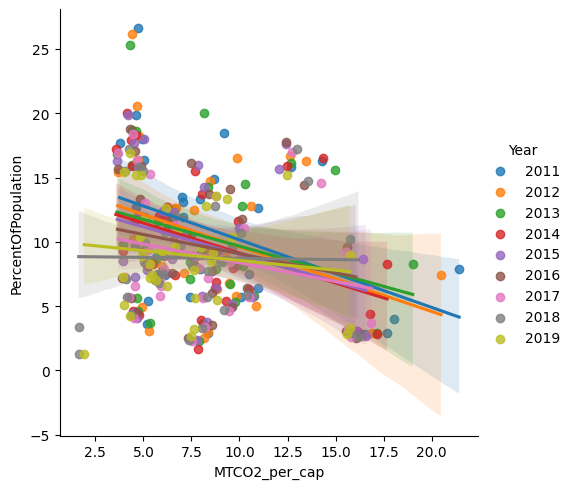

In [114]:
sns.lmplot(data=badhealth_df, x='MTCO2_per_cap', y='PercentOfPopulation', hue='Year')

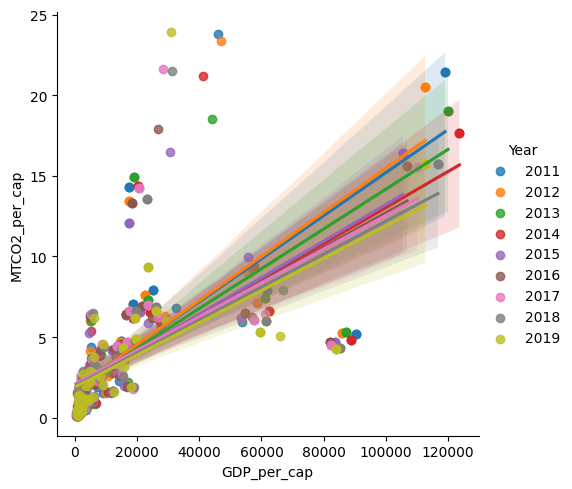

In [109]:
sns.lmplot(data=average_processed_df, x='GDP_per_cap', y='MTCO2_per_cap', hue='Year')

1.8589066707760775 0.0001333510469310751


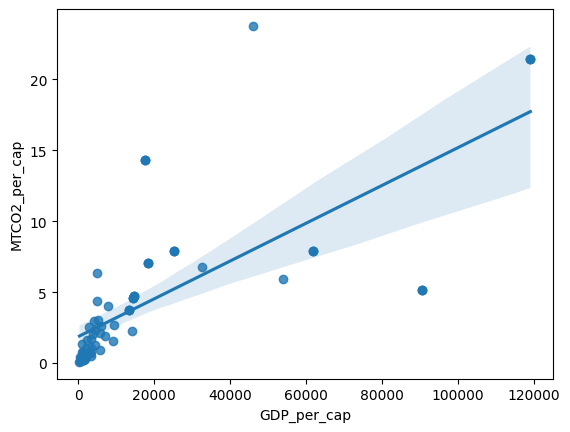

In [122]:
plot2011 = sns.regplot(average_processed_df_2011['GDP_per_cap'], average_processed_df_2011['MTCO2_per_cap'])
slope, intercept, r, plot2011, sterr = scipy.stats.linregress(x=plot2011.get_lines()[0].get_xdata(), y=plot2011.get_lines()[0].get_ydata())
print(intercept, slope)

1.8978422747896255 0.00011319817864386055


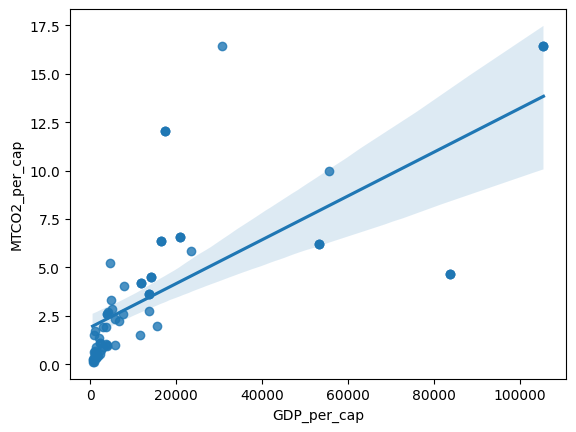

In [121]:
plot2015 = sns.regplot(average_processed_df_2015['GDP_per_cap'], average_processed_df_2015['MTCO2_per_cap'])
slope, intercept, r, plot2015, sterr = scipy.stats.linregress(x=plot2015.get_lines()[0].get_xdata(), y=plot2015.get_lines()[0].get_ydata())
print(intercept, slope)

1.8989406257517762 9.985320511921273e-05


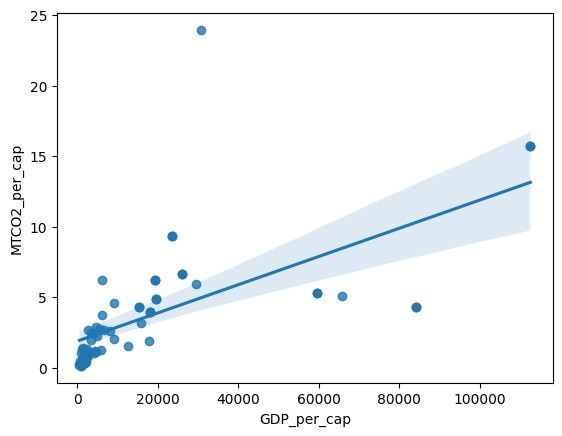

In [120]:
plot2019 = sns.regplot(average_processed_df_2019['GDP_per_cap'], average_processed_df_2019['MTCO2_per_cap'])
slope, intercept, r, plot2019, sterr = scipy.stats.linregress(x=plot2019.get_lines()[0].get_xdata(), y=plot2019.get_lines()[0].get_ydata())
print(intercept, slope)

In [100]:
#Refining 2011 database to just Bad percentages of perceived health.

badhealth_df_2011 = processed_df_2011[processed_df_2011['PrecievedHealth'] == 'Bad']

badhealth_df_2015 = processed_df_2015[processed_df_2015['PrecievedHealth'] == 'Bad']

badhealth_df_2019 = processed_df_2019[processed_df_2019['PrecievedHealth'] == 'Bad']

15.414404993313465 -0.5257478951988596


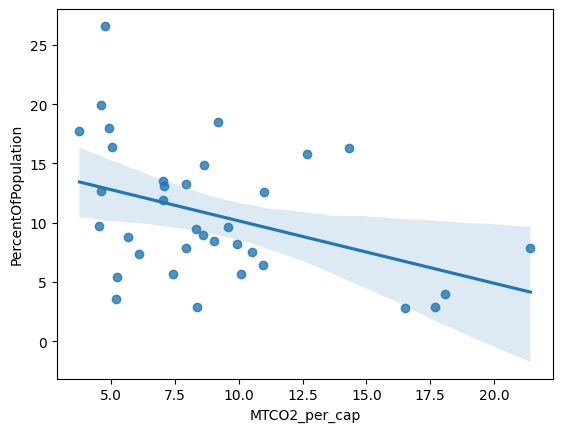

In [118]:
badhealthplot2011 = sns.regplot(badhealth_df_2011['MTCO2_per_cap'], badhealth_df_2011['PercentOfPopulation'])

slope, intercept, r, badhealthplot2011, sterr = scipy.stats.linregress(x=badhealthplot2011.get_lines()[0].get_xdata(), y=badhealthplot2011.get_lines()[0].get_ydata())
print(intercept, slope)

13.303367320369968 -0.42746593383221243


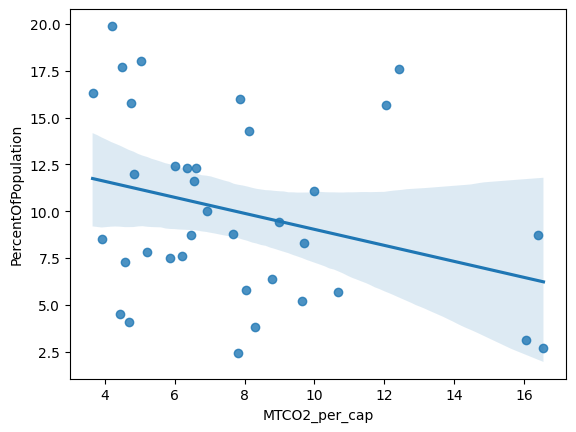

In [119]:
badhealthplot2015 = sns.regplot(badhealth_df_2015['MTCO2_per_cap'], badhealth_df_2015['PercentOfPopulation'])

slope, intercept, r, badhealthplot2015, sterr = scipy.stats.linregress(x=badhealthplot2015.get_lines()[0].get_xdata(), y=badhealthplot2015.get_lines()[0].get_ydata())
print(intercept, slope)

10.072117631424744 -0.15172482076542476


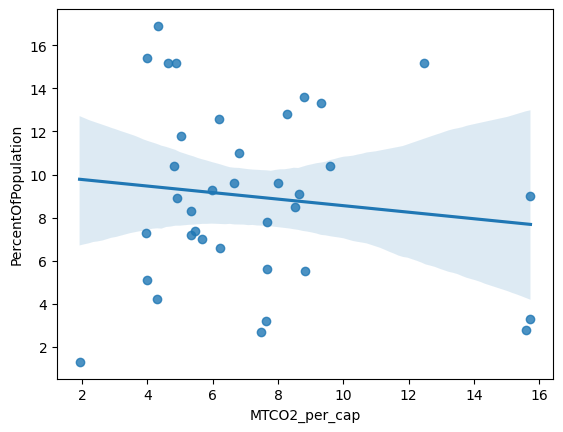

In [96]:
badhealthplot2019 = sns.regplot(badhealth_df_2019['MTCO2_per_cap'], badhealth_df_2019['PercentOfPopulation'])

slope, intercept, r, badhealthplot2019, sterr = scipy.stats.linregress(x=badhealthplot2019.get_lines()[0].get_xdata(), y=badhealthplot2019.get_lines()[0].get_ydata())
print(intercept, slope)